In [2]:
"""
IMPORTS
"""
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score,confusion_matrix

from sklearn import metrics

In [4]:
df_modelado= pd.read_csv("E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Outcomes\df_urgencias_total.csv",sep=',')
df_modelado

,Código Tipo Supuesto Urgente,Código Distrito Centro,Age_range_code,Nationality_code,Sexo_code,year,Quarteryear
0,30.0,11,0,1,1,2021,1
1,30.0,11,1,0,1,2021,1
2,40.0,5,6,0,1,2021,1
3,30.0,15,0,1,0,2021,1
4,40.0,10,6,0,1,2021,1
...,...,...,...,...,...,...,...
37901,30.0,20,1,0,1,2018,4
37902,40.0,12,6,0,1,2018,4
37903,30.0,12,1,1,1,2018,4
37904,30.0,12,6,0,0,2018,4


### 2.- Preparing TRAIN AND TEST DataFrames

In [6]:
X=df_modelado[['Código Distrito Centro','Age_range_code','Nationality_code','Sexo_code']]
y=df_modelado['Código Tipo Supuesto Urgente']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)       # Genero los datos para entrenamiento y testeo
print(X_train.shape)

print(X_test.shape)

print(y_train.shape)

print(y_test.shape)

(28429, 4)
(9477, 4)
(28429,)
(9477,)


In [6]:
train=pd.concat([X_train,y_train],axis=1)
train


,Código Distrito Centro,Age_range_code,Nationality_code,Sex_code,Código Tipo Supuesto Urgente
31192,1,4,0,1,40.0
14038,8,3,1,0,50.0
32286,17,3,0,0,30.0
2388,6,6,0,1,40.0
7041,6,0,1,1,50.0
...,...,...,...,...,...
20757,6,1,1,0,50.0
32103,15,6,0,1,40.0
30403,10,0,0,1,30.0
21243,6,1,1,1,50.0


In [7]:
test=pd.concat([X_test,y_test],axis=1)
test

,Código Distrito Centro,Age_range_code,Nationality_code,Sex_code,Código Tipo Supuesto Urgente
10570,7,3,1,1,50.0
16664,13,6,0,1,40.0
17216,6,2,1,1,50.0
20106,6,3,0,0,50.0
28947,12,0,0,1,30.0
...,...,...,...,...,...
3318,7,1,1,1,50.0
5415,6,3,1,0,50.0
12002,6,6,1,1,50.0
7844,6,1,1,0,50.0


In [8]:
train.to_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_train.csv',header=True,index=False)
test.to_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_test.csv',header=True,index=False)

### 3.- My first Model (DecisionTreeClassifier)

In [3]:
train=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_train.csv',sep=',')
test=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_test.csv',sep=',')


In [4]:
X_test=test[['Código Distrito Centro','Age_range_code','Nationality_code','Sexo_code','year']]
X_train=train[['Código Distrito Centro','Age_range_code','Nationality_code','Sexo_code','year']]
y_test=test['Código Tipo Supuesto Urgente']
y_train=train['Código Tipo Supuesto Urgente']

Accuracy 0.7555133481059407
Precision 0.4671284639535143
Recall 0.4570369534043424
ROC 0.7784773464682482
F1 0.4485520220043739


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

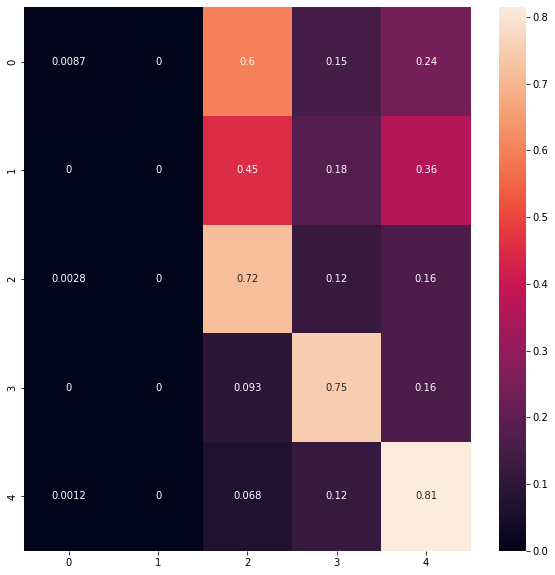

In [8]:
tree_reg = DecisionTreeClassifier(random_state=20)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)



print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred,average='macro'))
print('Recall', recall_score(y_test, y_pred,average='macro'))
print('ROC', roc_auc_score(y_test, tree_reg.predict_proba(X_test),multi_class='ovr'))
print('F1', f1_score(y_test, y_pred,average='macro'))

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True)

In [13]:
def error_modelo(model, X_test, y_test):
    '''
    Dejamos grabada cada uno de los parámetros de cada modelo y hacemos su representación
    '''
    y_pred = model.predict(X_test)
    f1_model=f1_score(y_test, y_pred,average='macro')
    acc_model=accuracy_score(y_test, y_pred)
    precision_model=precision_score(y_test, y_pred,average='macro')
    recall_model=recall_score(y_test, y_pred,average='macro')
    roc_auc_model=roc_auc_score(y_test, model.predict_proba(X_test),multi_class='ovr')
    conf_model=confusion_matrix(y_test, y_pred, normalize='true')
    model_error = {'accuracy': acc_model, 'f-1': f1_model, 'recall': recall_model , 'precision': precision_model}
    df=pd.DataFrame.from_dict(model_error,orient='index')
    print('Accuracy', acc_model)
    print('F1', f1_model)
    print('Precision', precision_model)
    print('Recall', recall_model)
    print('-'*30)
    print('ROC', roc_auc_model)

    plt.figure(figsize=(10,10))
    sns.heatmap(conf_model, annot=True)
    return df

Accuracy 0.7555133481059407
F1 0.4485520220043739
Precision 0.4671284639535143
Recall 0.4570369534043424
------------------------------
ROC 0.7784773464682482


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0
accuracy,0.755513
f-1,0.448552
recall,0.457037
precision,0.467128


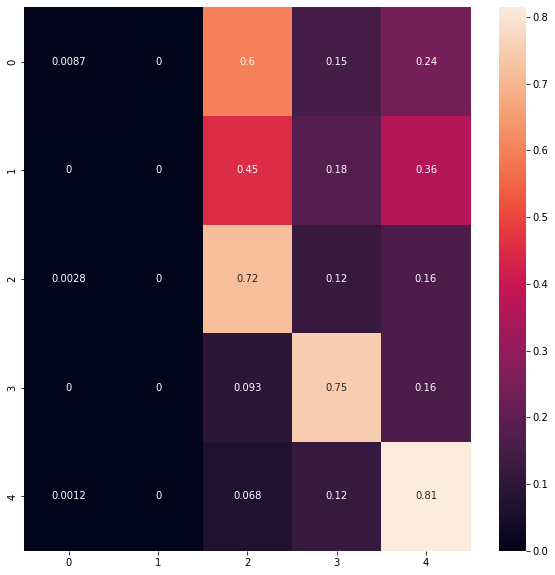

In [14]:
error_modelo(tree_reg,X_test,y_test)